### MACHINE LEARNING PROJECT I

#### TEAM MEMBERS: ASLI YORUSUN - ERDEM BOCUGOZ - SERIF SONER SERBEST

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt

from proj1_helpers import *
from implementations import *
from test import *
from data_cleaning import *
%load_ext autoreload
%autoreload 2

In [2]:
prediction,data,id_ = load_csv_data("train.csv", sub_sample=False)

In [3]:
data.shape

(250000, 30)

### Data Cleaning & Standardization

In [4]:
data = clean_data(data)

In [5]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [6]:
x,mean_x,std_x = standardize(data)
y,tx = build_model_data(prediction,x)

In [7]:
#data = reject_outliers(data)

### Gradient Descent

In [9]:
# Define the parameters of the algorithm.
max_iters = 5
gamma = 0.005

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/4): loss=0.171334
Gradient Descent(1/4): loss=0.1701457980941988
Gradient Descent(2/4): loss=0.16898500063033609
Gradient Descent(3/4): loss=0.1678505588272017
Gradient Descent(4/4): loss=0.16674147735682052
Gradient Descent: execution time=0.099 seconds


### Stochastic Gradient Descent

In [10]:
# Define the parameters of the algorithm.
max_iters = 5
gamma = 0.005
batch_size = 1

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/4): loss=0.171334
SGD(1/4): loss=0.16984704729702665
SGD(2/4): loss=0.1698483672645565
SGD(3/4): loss=0.16987352549221288
SGD(4/4): loss=0.16987045568834358
SGD: execution time=0.315 seconds


### Least Squares

In [11]:
weights = least_squares(y, tx)
# compute RMSE
mse = compute_loss(y, tx, weights)
rmse = np.sqrt(2 * mse)

print("Least Squares, rmse={loss}".format(loss=rmse)) 

Least Squares, rmse=0.41255875470141107


### Ridge Regression

proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.806
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.807
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.807
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.371, Testing RMSE=1.808
proportion=0.9, degree=10, l

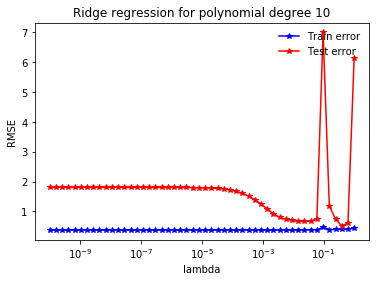

In [13]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-10, 0, 50)
    # split data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    # ridge regression with different lambda
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        weight = ridge_regression(y_tr, tx_tr, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, tx_tr, weight)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, tx_te, weight)))

        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    
seed = 1
degree = 10
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)

### Logistic Regression

In [10]:
def logistic_regression_gradient_descent_demo(y, tx):
    y = np.expand_dims(y, axis=1)
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
   # tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    t = tx.dot(w);

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        
        # log info
        #if iter % 100 == 0:
            #print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
            
                
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    #visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=compute_log_loss(y, tx, w)))
    return w

#w = logistic_regression_gradient_descent_demo(y, tx)

### Cross Validation

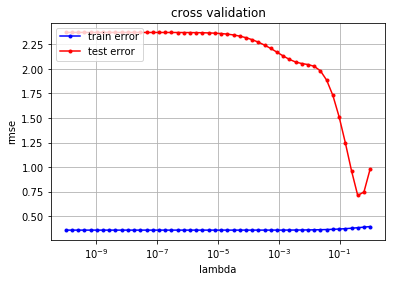

In [26]:
def cross_validation_demo(y,x):
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-10, 0, 50)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        for k in range(4):
            [a,b] = cross_validation(y,x,k_indices,k,lambda_,degree)
            rmse_tr.append(a)
            rmse_te.append(b)
    rmse_tr = np.asarray(rmse_tr).reshape(-1,4)
    rmse_te = np.asarray(rmse_te).reshape(-1,4)
    rmse_tr = np.mean(rmse_tr,axis=1)
    rmse_te = np.mean(rmse_te,axis=1)
    # cross validation: TODO
    # ***************************************************   
    cross_validation_visualization(lambdas,rmse_tr,rmse_te)
cross_validation_demo(y,tx)

### TEST

In [7]:
test_label,test_data,test_id_ = load_csv_data("test.csv", sub_sample=False)

In [17]:
test_data = clean_data(test_data)

In [8]:
x_test,mean_test,std_x_test = standardize(test_data)
y_test,tx_test = build_model_data(test_label,x_test)

In [11]:
#weight = logistic_regression_gradient_descent_demo(y,tx)
weights = logistic_regression_gradient_descent_demo(y, tx)

/Users/erdembocugoz/Desktop/Machine Learning/MLProject1/implementations.py:130: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))


loss=184883.9378858205


In [12]:
y_pred = predict_labels(weights,tx_test)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [13]:
create_csv_submission(test_id_,y_pred,"logisticReg_submission.csv")